In [304]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


pos_data = pd.read_excel("Retail_data.xlsx", sheet_name="POS DATA")
loyalty_data = pd.read_excel("Retail_data.xlsx", sheet_name="LOYALTY")
barcodes_data = pd.read_excel("Retail_data.xlsx", sheet_name="barcodes")
product_taxonomy_data = pd.read_excel("Retail_data.xlsx", sheet_name="product taxonomy")

In [305]:
pos_data

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12
3,1106160983,41388,211069400000,1,0.749817,9.162006e+12
4,1108695491,41395,520286400380,2,0.600000,9.161004e+12
...,...,...,...,...,...,...
235469,1093498033,41348,210996300000,1,4.040059,9.164013e+12
235470,1102688274,41377,520423909932,1,1.000000,9.162000e+12
235471,1089686077,41337,210757000000,1,1.330066,9.164004e+12
235472,1099519315,41368,520423915759,2,3.180015,NaN


In [211]:
loyalty_data

,CardholderID,Age,Gender,MaritalStatus,HouseholdSize,Children
0,9162002273446,51.0,Male,Single (Alone),1.0,0.0
1,9164011076155,72.0,Female,NaN,2.0,0.0
2,9162001049684,60.0,Female,NaN,1.0,0.0
3,9162005608405,NaN,Female,Married,5.0,NaN
4,9163002257856,50.0,Female,NaN,1.0,0.0
...,...,...,...,...,...,...
191124,9160000248237,75.0,Male,Married,1.0,0.0
191125,9162008409016,49.0,Female,Married,4.0,2.0
191126,9164011002963,NaN,NaN,NaN,NaN,0.0
191127,9161003772316,NaN,Female,NaN,1.0,0.0


In [212]:
barcodes_data

,Barcode,CategoryA,CategoryB,CategoryC,CategoryD
0,360923242189,60,60,767,2
1,501132123894,10,12,287,2
2,520223414111,30,21,3,3
3,400580827457,10,12,286,2
4,210213800000,20,51,110,1
...,...,...,...,...,...
9317,520138602854,10,12,281,1
9318,871811442797,10,12,285,1
9319,871811456399,10,12,287,2
9320,520134749024,10,12,283,1


In [213]:
product_taxonomy_data


,CategoryA,CategoryB,CategoryBDescription,CategoryC,CategoryCDescription,CategoryD,CategoryDDescription
0,10,11,DRINKS,261,BEVERAGES,1,cola
1,10,11,DRINKS,261,BEVERAGES,2,lime
2,10,11,DRINKS,261,BEVERAGES,3,juice
3,10,11,DRINKS,261,BEVERAGES,5,sport drinks
4,10,11,DRINKS,261,BEVERAGES,6,tea
...,...,...,...,...,...,...,...
698,90,91,telephone,911,AIR TIME WIND,1,AIR TIME WIND
699,90,91,telephone,912,AIR TIME COSMOTE,1,AIR TIME COSMOTE
700,90,91,telephone,913,AIR TIME Q,1,AIR TIME Q
701,90,91,telephone,916,AIR TIME OTENET,1,AIR TIME OTENET


In [308]:
merged_pos_loyalty = pd.merge(pos_data, loyalty_data, left_on='Card_ID' ,right_on='CardholderID', how='left')
pos_with_categories = pd.merge(merged_pos_loyalty, barcodes_data, on='Barcode', how='left')



In [309]:
df= pos_with_categories

In [312]:
df

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CardholderID,Age,Gender,MaritalStatus,HouseholdSize,Children,CategoryA,CategoryB,CategoryC,CategoryD
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12,9.160004e+12,54.0,Female,NaN,2.0,0.0,10.0,14.0,239.0,2.0
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12,9.164002e+12,52.0,Unknown,Married,3.0,2.0,10.0,12.0,281.0,1.0
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12,9.164013e+12,NaN,Female,NaN,1.0,0.0,10.0,14.0,239.0,2.0
3,1106160983,41388,211069400000,1,0.749817,9.162006e+12,9.162006e+12,72.0,Female,NaN,1.0,0.0,20.0,56.0,183.0,9.0
4,1108695491,41395,520286400380,2,0.600000,9.161004e+12,9.161004e+12,51.0,Female,NaN,1.0,0.0,40.0,31.0,316.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235469,1093498033,41348,210996300000,1,4.040059,9.164013e+12,9.164013e+12,NaN,NaN,NaN,NaN,0.0,20.0,56.0,181.0,11.0
235470,1102688274,41377,520423909932,1,1.000000,9.162000e+12,9.162000e+12,NaN,NaN,NaN,NaN,0.0,10.0,14.0,201.0,1.0
235471,1089686077,41337,210757000000,1,1.330066,9.164004e+12,9.164004e+12,77.0,Male,NaN,3.0,NaN,20.0,56.0,183.0,11.0
235472,1099519315,41368,520423915759,2,3.180015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,14.0,202.0,2.0


In [313]:
# lets check the distribution of each datatypes

In [314]:
import numpy as np

df_num=df.select_dtypes(np.number)
df_cat=df.select_dtypes('object')

In [315]:
from warnings import filterwarnings
filterwarnings('ignore')

In [219]:
for i in df.columns:
    print(df[i].value_counts())

Basket_ID
1106912129    36
1106910678    36
1105406137    30
1104991701    23
1107339258    23
              ..
1106915800     1
1101176234     1
1098814151     1
1089684637     1
1109166470     1
Name: count, Length: 46457, dtype: int64
Date
41349    7130
41356    6704
41363    6347
41377    6131
41348    6018
41342    5825
41337    5646
41370    5580
41396    5483
41359    5466
41393    5465
41384    5465
41391    5302
41395    5229
41362    5165
41365    5100
41379    5021
41355    5012
41376    4975
41394    4953
41386    4951
41372    4935
41354    4932
41367    4891
41339    4868
41361    4830
41344    4764
41369    4761
41390    4717
41340    4635
41352    4623
41345    4547
41374    4432
41383    4421
41366    4273
41341    4272
41380    4238
41353    4233
41373    4228
41368    4227
41382    4223
41389    4161
41375    3954
41388    3949
41347    3938
41387    3929
41381    3912
41346    3613
Name: count, dtype: int64
Barcode
520423930913    3034
213467300000    2733
212735100

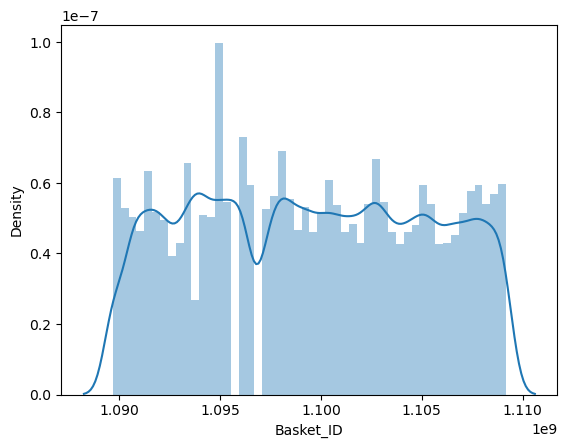

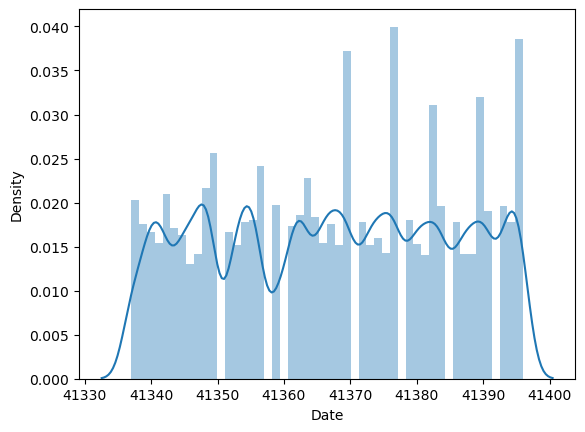

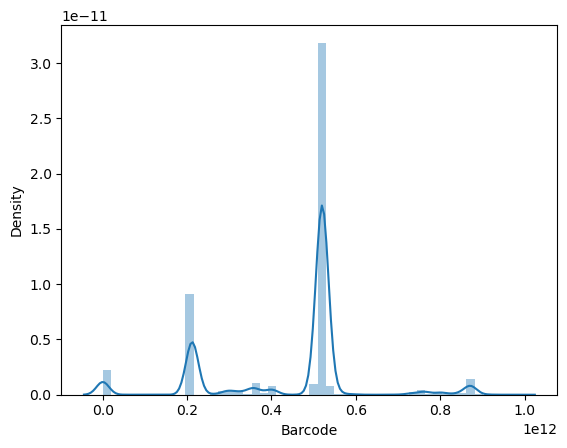

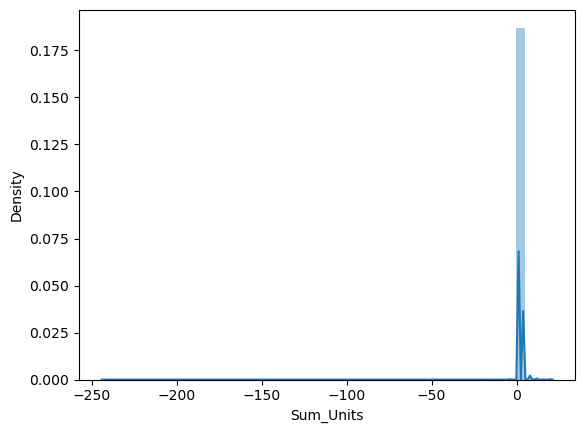

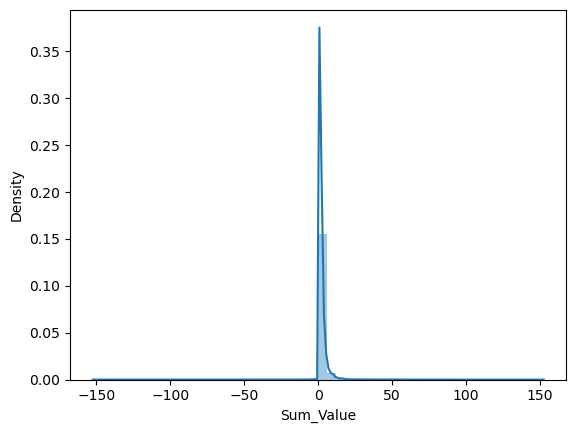

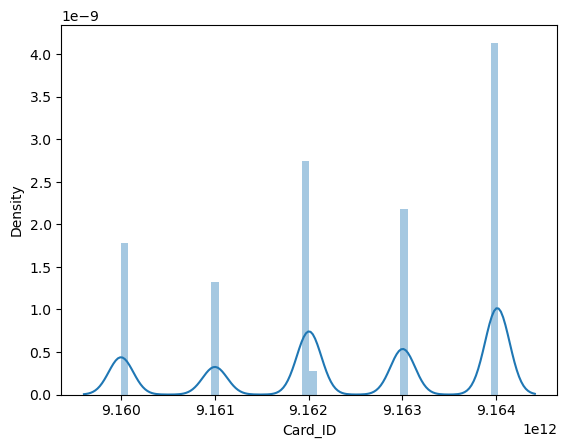

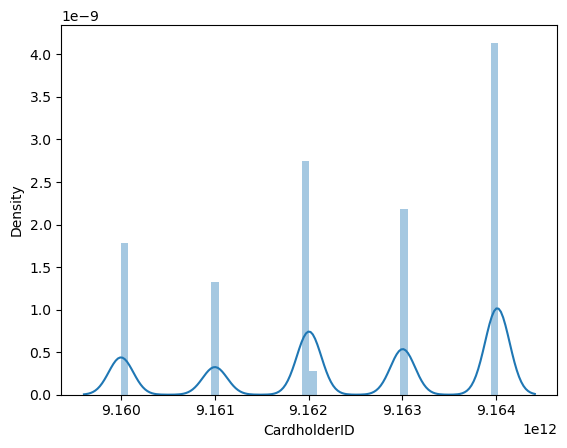

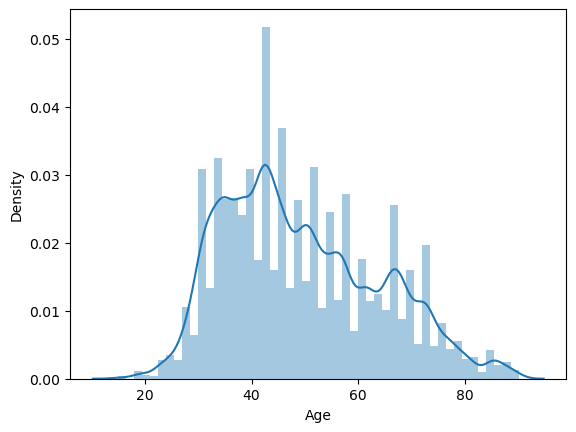

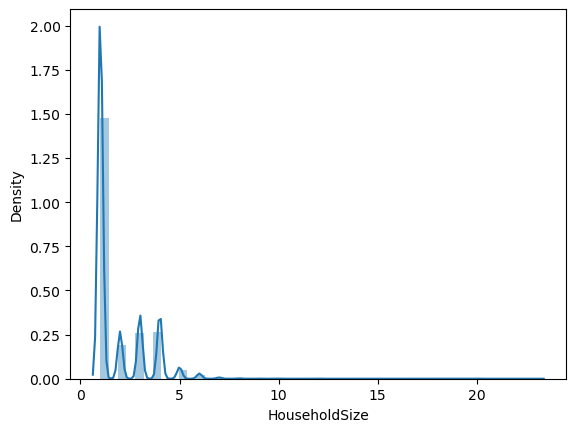

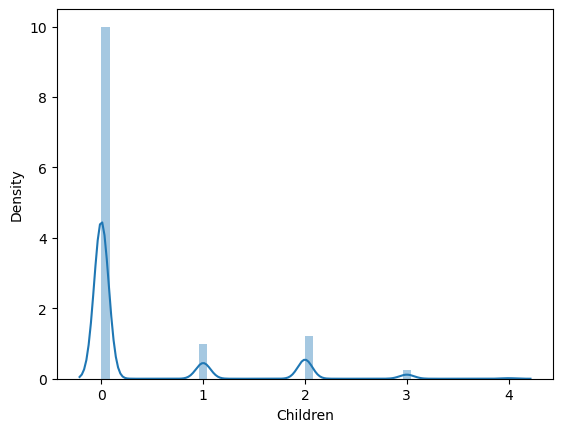

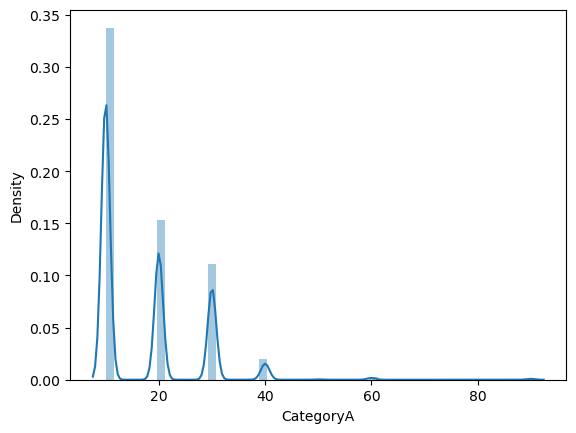

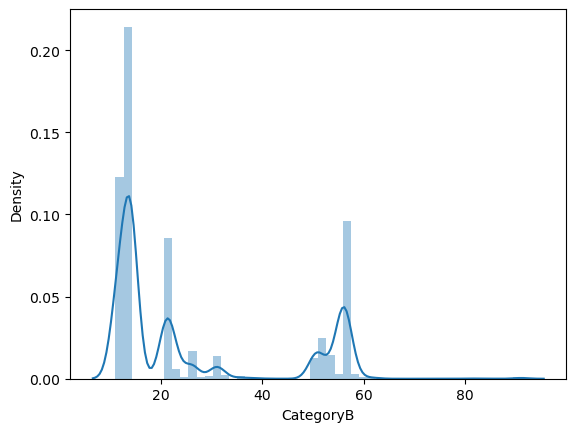

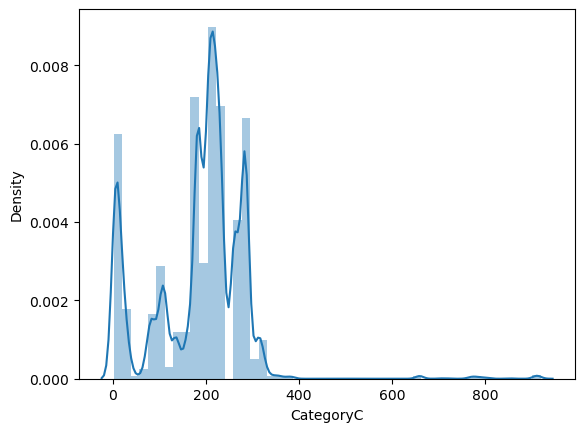

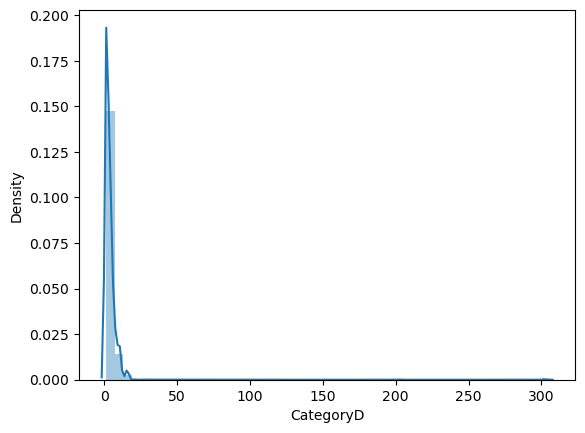

In [220]:
import seaborn as sb
for i in df_num.columns:
    sb.distplot(df_num[i])
    plt.show()

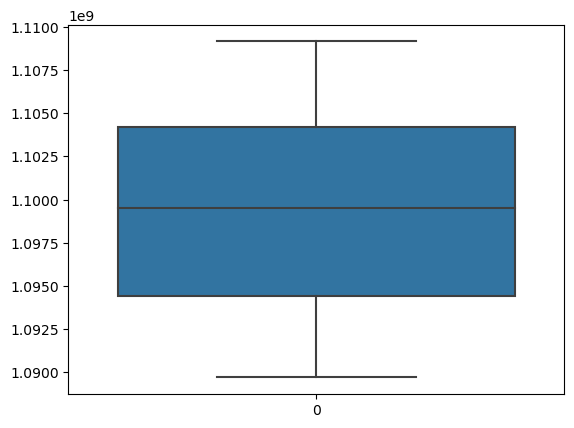

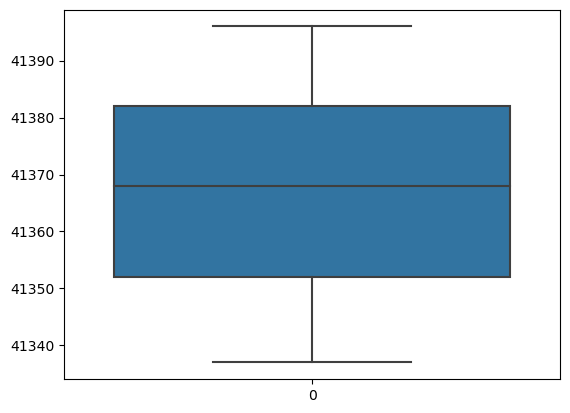

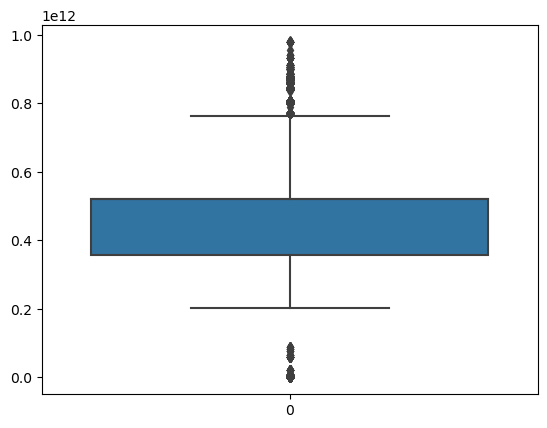

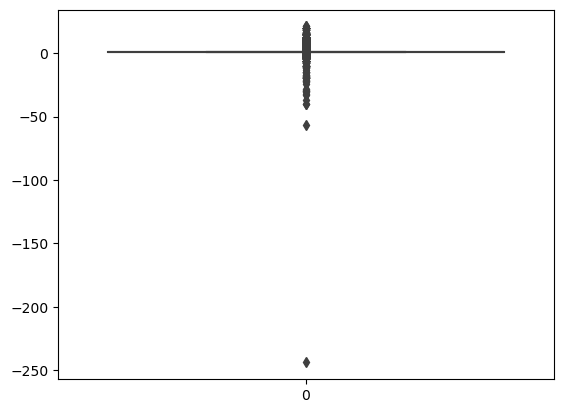

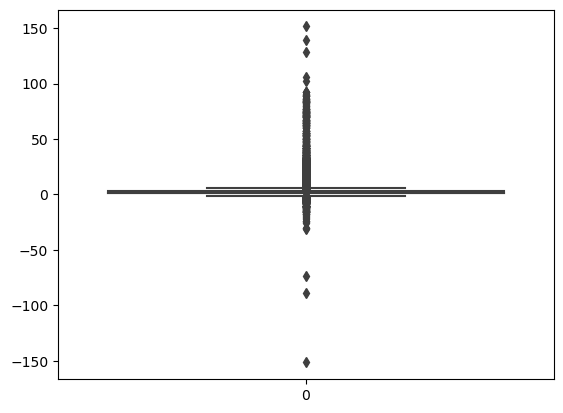

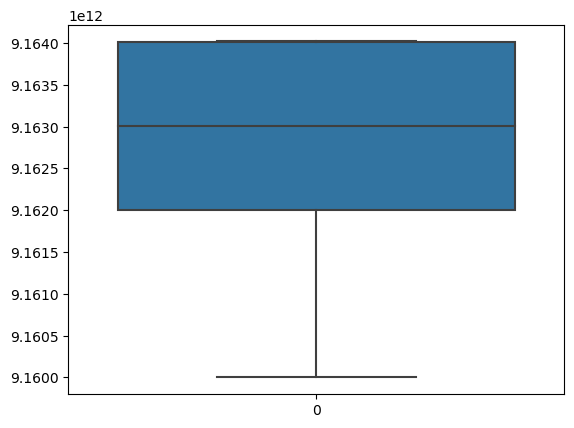

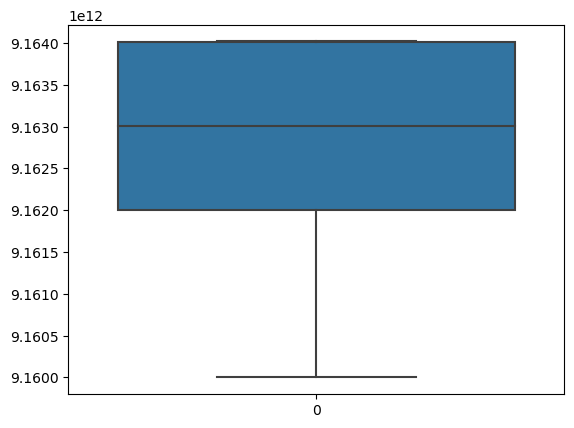

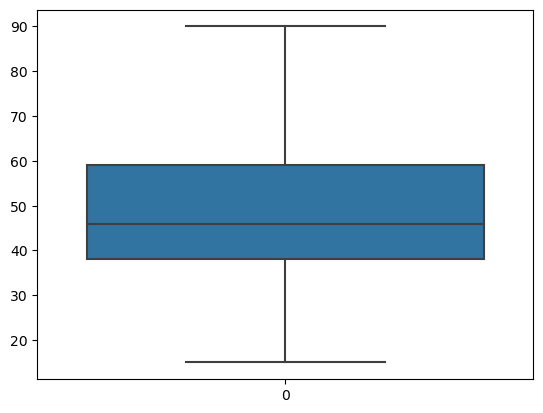

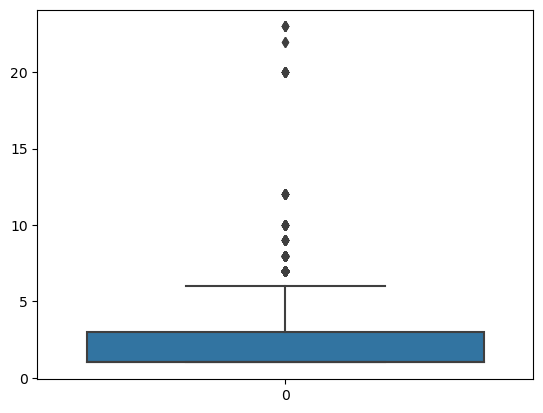

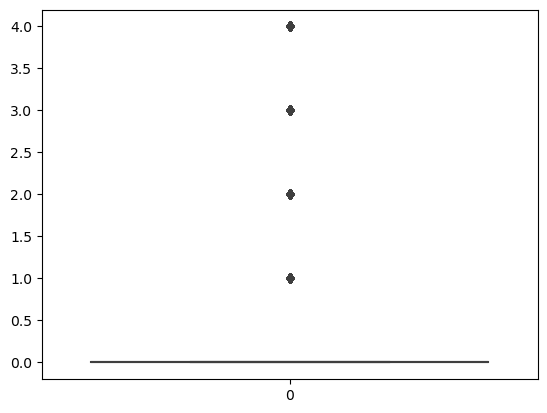

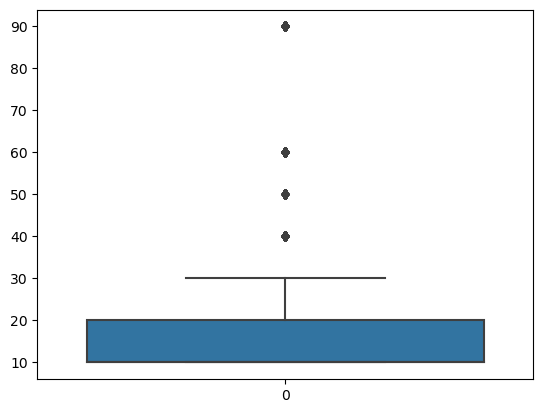

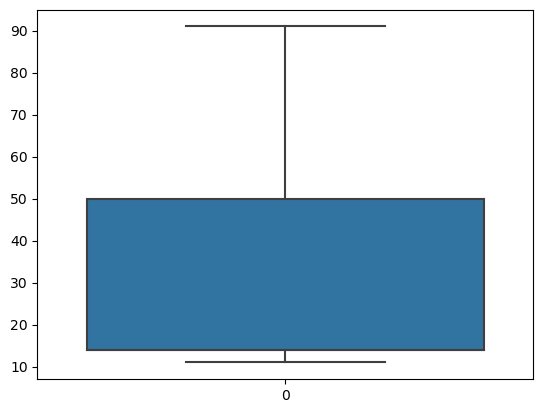

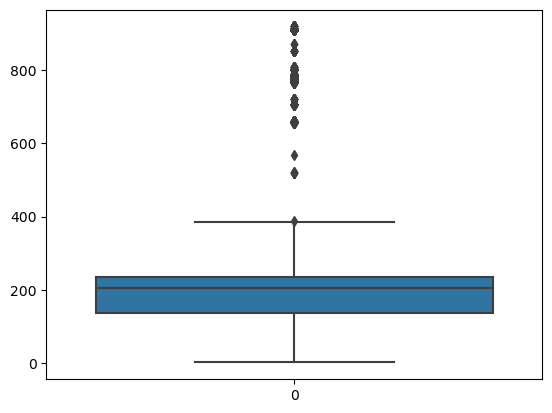

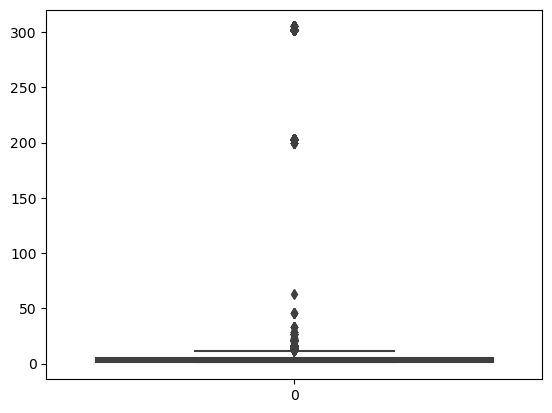

In [221]:
for i in df_num.columns:
    sb.boxplot(df[i])
    plt.show()

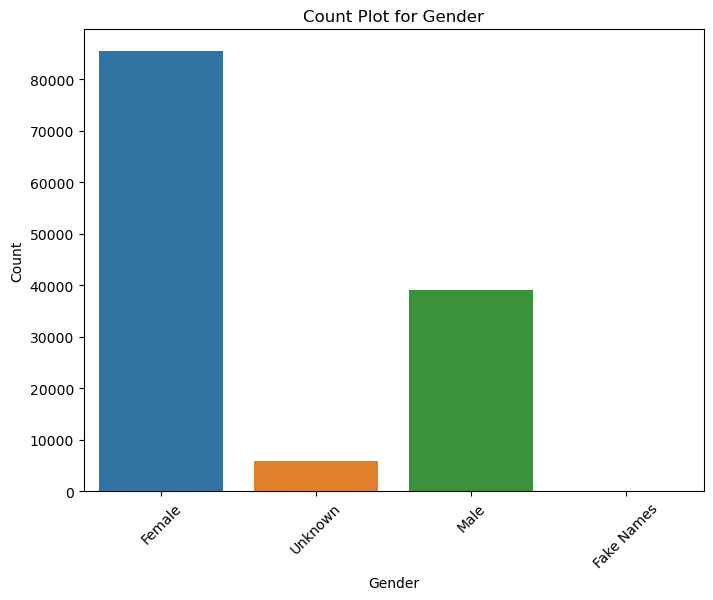

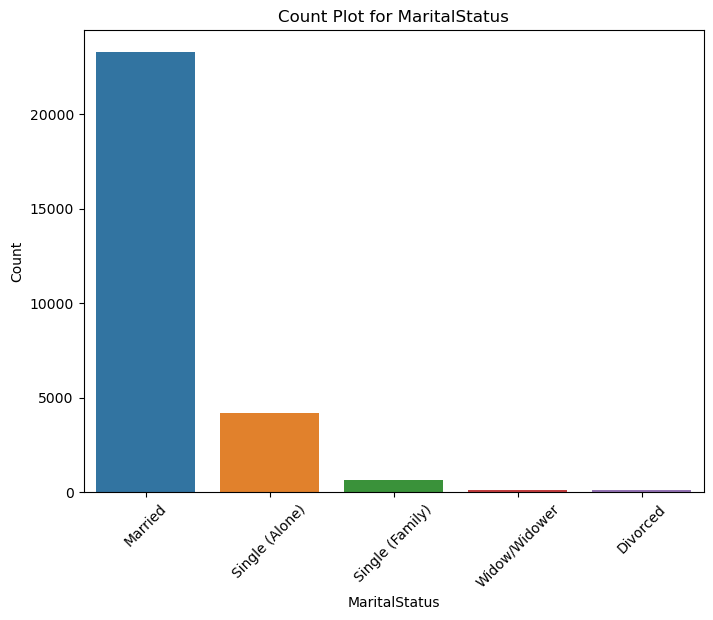

In [222]:
import seaborn as sb
import matplotlib.pyplot as plt


for i in df_cat.columns:
    plt.figure(figsize=(8, 6)) 
    sb.countplot(data=df_cat, x=i)
    plt.title(f'Count Plot for {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.show()

In [223]:
df

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CardholderID,Age,Gender,MaritalStatus,HouseholdSize,Children,CategoryA,CategoryB,CategoryC,CategoryD
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12,9.160004e+12,54.0,Female,NaN,2.0,0.0,10.0,14.0,239.0,2.0
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12,9.164002e+12,52.0,Unknown,Married,3.0,2.0,10.0,12.0,281.0,1.0
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12,9.164013e+12,NaN,Female,NaN,1.0,0.0,10.0,14.0,239.0,2.0
3,1106160983,41388,211069400000,1,0.749817,9.162006e+12,9.162006e+12,72.0,Female,NaN,1.0,0.0,20.0,56.0,183.0,9.0
4,1108695491,41395,520286400380,2,0.600000,9.161004e+12,9.161004e+12,51.0,Female,NaN,1.0,0.0,40.0,31.0,316.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235469,1093498033,41348,210996300000,1,4.040059,9.164013e+12,9.164013e+12,NaN,NaN,NaN,NaN,0.0,20.0,56.0,181.0,11.0
235470,1102688274,41377,520423909932,1,1.000000,9.162000e+12,9.162000e+12,NaN,NaN,NaN,NaN,0.0,10.0,14.0,201.0,1.0
235471,1089686077,41337,210757000000,1,1.330066,9.164004e+12,9.164004e+12,77.0,Male,NaN,3.0,NaN,20.0,56.0,183.0,11.0
235472,1099519315,41368,520423915759,2,3.180015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,14.0,202.0,2.0


In [224]:
df.isnull().sum()

Basket_ID             0
Date                  0
Barcode               0
Sum_Units             0
Sum_Value             0
Card_ID           86888
CardholderID      86888
Age              170429
Gender           104892
MaritalStatus    207098
HouseholdSize    104860
Children          99067
CategoryA          2227
CategoryB          2227
CategoryC          2227
CategoryD          2227
dtype: int64

In [316]:
# Assuming 'merged_data' contains the data from the merge of different DataFrames

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 Basket_ID             0
Date                  0
Barcode               0
Sum_Units             0
Sum_Value             0
Card_ID           86888
CardholderID      86888
Age              170429
Gender           104892
MaritalStatus    207098
HouseholdSize    104860
Children          99067
CategoryA          2227
CategoryB          2227
CategoryC          2227
CategoryD          2227
dtype: int64


Missing Value treatment

In [317]:
# Handling missing values - Example: Fill missing numeric values with mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
merged_data[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())



In [318]:
# Handling categorical missing values - Example: Fill missing categorical values with a placeholder
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')




In [319]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)



In [320]:
# Check the data types after conversion
print("Data Types:\n", df.dtypes)


Data Types:
 Basket_ID          int64
Date               int64
Barcode            int64
Sum_Units          int64
Sum_Value        float64
Card_ID          float64
CardholderID     float64
Age              float64
Gender            object
MaritalStatus     object
HouseholdSize    float64
Children         float64
CategoryA        float64
CategoryB        float64
CategoryC        float64
CategoryD        float64
dtype: object


In [322]:
df.isnull().sum()

Basket_ID             0
Date                  0
Barcode               0
Sum_Units             0
Sum_Value             0
Card_ID           86888
CardholderID      86888
Age              170429
Gender                0
MaritalStatus         0
HouseholdSize    104860
Children          99067
CategoryA          2227
CategoryB          2227
CategoryC          2227
CategoryD          2227
dtype: int64

In [323]:
df.shape

(235474, 16)

In [173]:
# we can see there are alot of NAN values and ouliers

In [325]:
df1= df

In [326]:
df1.shape

(235474, 16)

In [327]:
df1

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CardholderID,Age,Gender,MaritalStatus,HouseholdSize,Children,CategoryA,CategoryB,CategoryC,CategoryD
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12,9.160004e+12,54.0,Female,Unknown,2.0,0.0,10.0,14.0,239.0,2.0
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12,9.164002e+12,52.0,Unknown,Married,3.0,2.0,10.0,12.0,281.0,1.0
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12,9.164013e+12,NaN,Female,Unknown,1.0,0.0,10.0,14.0,239.0,2.0
3,1106160983,41388,211069400000,1,0.749817,9.162006e+12,9.162006e+12,72.0,Female,Unknown,1.0,0.0,20.0,56.0,183.0,9.0
4,1108695491,41395,520286400380,2,0.600000,9.161004e+12,9.161004e+12,51.0,Female,Unknown,1.0,0.0,40.0,31.0,316.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235469,1093498033,41348,210996300000,1,4.040059,9.164013e+12,9.164013e+12,NaN,Unknown,Unknown,NaN,0.0,20.0,56.0,181.0,11.0
235470,1102688274,41377,520423909932,1,1.000000,9.162000e+12,9.162000e+12,NaN,Unknown,Unknown,NaN,0.0,10.0,14.0,201.0,1.0
235471,1089686077,41337,210757000000,1,1.330066,9.164004e+12,9.164004e+12,77.0,Male,Unknown,3.0,NaN,20.0,56.0,183.0,11.0
235472,1099519315,41368,520423915759,2,3.180015,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,10.0,14.0,202.0,2.0


Outlier Treatment

In [340]:
# From the box blot, we can observe there are outliers in Sum_Units and Sum_Value, which are our primary metrices.

def remove_outliers(df1, i):
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 # Adjust this threshold as needed for your data

    df_new = df1[~((df1[i] < (Q1 - threshold * IQR)) | (df1[i] > (Q3 + threshold * IQR)))]

    return df_new

outlier_treatment_cols = ['Sum_Units', 'Sum_Value']

for col in outlier_treatment_cols:
    df2 = remove_outliers(df1, col)

In [341]:
df2.shape

(218566, 16)

In [342]:
df2

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CardholderID,Age,Gender,MaritalStatus,HouseholdSize,Children,CategoryA,CategoryB,CategoryC,CategoryD
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12,9.160004e+12,54.0,Female,Unknown,2.0,0.0,10.0,14.0,239.0,2.0
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12,9.164002e+12,52.0,Unknown,Married,3.0,2.0,10.0,12.0,281.0,1.0
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12,9.164013e+12,NaN,Female,Unknown,1.0,0.0,10.0,14.0,239.0,2.0
3,1106160983,41388,211069400000,1,0.749817,9.162006e+12,9.162006e+12,72.0,Female,Unknown,1.0,0.0,20.0,56.0,183.0,9.0
4,1108695491,41395,520286400380,2,0.600000,9.161004e+12,9.161004e+12,51.0,Female,Unknown,1.0,0.0,40.0,31.0,316.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235469,1093498033,41348,210996300000,1,4.040059,9.164013e+12,9.164013e+12,NaN,Unknown,Unknown,NaN,0.0,20.0,56.0,181.0,11.0
235470,1102688274,41377,520423909932,1,1.000000,9.162000e+12,9.162000e+12,NaN,Unknown,Unknown,NaN,0.0,10.0,14.0,201.0,1.0
235471,1089686077,41337,210757000000,1,1.330066,9.164004e+12,9.164004e+12,77.0,Male,Unknown,3.0,NaN,20.0,56.0,183.0,11.0
235472,1099519315,41368,520423915759,2,3.180015,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,10.0,14.0,202.0,2.0


In [233]:
# Our missing value & Outlier treatment is done

# Basket Segmentation

Considering CatagoryA & CatagoryB is 2 dimensions.

In [407]:
# Define metrics, dimensions, and identifier for segmentation
metrics = ['Sum_Units', 'Sum_Value']
dimensions = ['CategoryA', 'CategoryB']
identifier = 'Basket_ID'  # Replace with the actual column name

# Check if specified columns are present in the DataFrame
required_columns = dimensions + [identifier] + metrics
missing_columns = [col for col in required_columns if col not in df2.columns]

if missing_columns:
    print(f"Error: The following columns are missing in the DataFrame: {missing_columns}")
else:
    # Create segmented baskets based on metrics, dimensions, and identifier
    segmented_baskets = df2.groupby([identifier] + dimensions  )[metrics].sum().reset_index()

    # Example output
    print(segmented_baskets)

         Basket_ID  CategoryA  CategoryB  Sum_Units  Sum_Value
0       1089674688       30.0       21.0          1   1.640000
1       1089674689       10.0       12.0          2   1.980015
2       1089674689       10.0       14.0          3   0.620015
3       1089674689       30.0       21.0          1   0.989993
4       1089674690       20.0       50.0          1   1.000000
...            ...        ...        ...        ...        ...
122915  1109175674       10.0       14.0          4   7.900015
122916  1109175674       20.0       51.0          5  20.149405
122917  1109175674       20.0       56.0          4   7.779897
122918  1109175674       30.0       21.0          3   3.120000
122919  1109175675       30.0       26.0          1   3.620015

[122920 rows x 5 columns]


In [408]:
# Sort the DataFrame in descending order based on 'Sum_Units'
segmented_baskets_sorted_units = segmented_baskets.sort_values(by='Sum_Units', ascending=False)

# Sort the DataFrame in descending order based on 'Sum_Value'
segmented_baskets_sorted_value = segmented_baskets.sort_values(by='Sum_Value', ascending=False)


print("Sorted by Sum_Units:")
print(segmented_baskets_sorted_units)

print("\nSorted by Sum_Value:")
print(segmented_baskets_sorted_value)

Sorted by Sum_Units:
         Basket_ID  CategoryA  CategoryB  Sum_Units  Sum_Value
3619    1090426662       10.0       14.0         22  11.180074
54255   1098436706       10.0       14.0         22  17.010007
6641    1090792289       10.0       14.0         22  18.810066
6171    1090776406       10.0       14.0         21  19.270081
99122   1105430904       10.0       14.0         20   5.800029
...            ...        ...        ...        ...        ...
108743  1106912129       10.0       14.0         -5  -3.120029
108374  1106910678       10.0       14.0         -5  -3.120029
31982   1094754872       10.0       14.0         -6  -4.900015
70638   1100781655       10.0       11.0         -7  -1.469993
98750   1105406137       10.0       14.0        -10 -11.370066

[122920 rows x 5 columns]

Sorted by Sum_Value:
         Basket_ID  CategoryA  CategoryB  Sum_Units  Sum_Value
107963  1106888960       10.0       12.0         14  43.760147
67835   1100353747       10.0       12.0        

In [409]:
threshold_value = segmented_baskets['Sum_Value'].quantile(0.50)

In [410]:
threshold_value

2.40000009536743

In [411]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


selected_features = ['CategoryA', 'CategoryB', 'Sum_Units', 'Sum_Value']


data_for_clustering = segmented_baskets[selected_features].fillna(0)  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [412]:
# Determine the optimal number of clusters using the Elbow Method
# In this example, we're iterating through a range of clusters to find the optimal number using inertia (within-cluster sum of squares)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

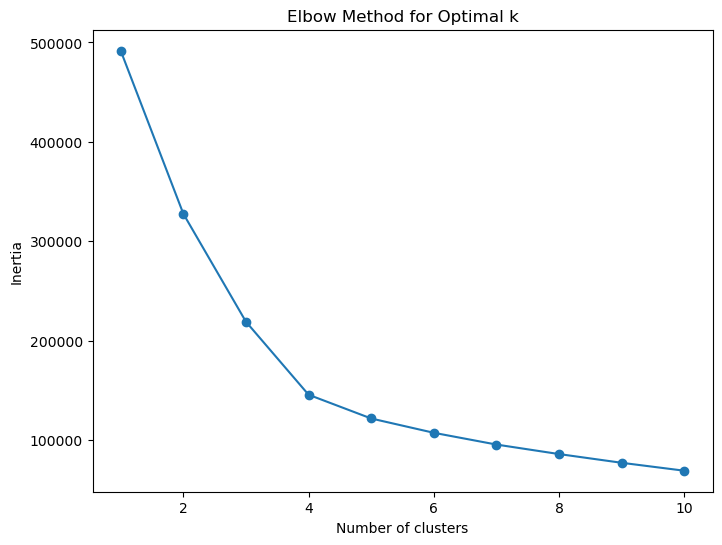

In [413]:
# Plot the Elbow Method to visualize the optimal number of clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [414]:
# Based on the Elbow Method, select the optimal number of clusters (k)
optimal_k = 4 


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

In [415]:
segmented_baskets['Cluster'] = cluster_labels


cluster_summary = segmented_baskets.groupby('Cluster').agg({
    'CategoryA': 'count',
    'CategoryB': 'count',
    'Sum_Units': 'sum',
    'Sum_Value': 'sum',
    'Basket_ID': 'count'  
}).rename(columns={'Basket_ID': 'Basket_count'})


print(cluster_summary)

         CategoryA  CategoryB  Sum_Units      Sum_Value  Basket_count
Cluster                                                              
0            43902      43902      83567  110967.604991         43902
1            11893      11893      81010  104390.495510         11893
2            32564      32564      51172   86777.763996         32564
3            34561      34561      53692   87182.667736         34561


In [416]:
segmented_baskets['Cluster'] = cluster_labels


cluster_summary = segmented_baskets.groupby(['Cluster','CategoryA','CategoryB']).agg({
    'Sum_Units': 'sum',
    'Sum_Value': 'sum',
    'Basket_ID': 'count'  
}).rename(columns={'Basket_ID': 'Basket_count'})


print(cluster_summary)

                             Sum_Units     Sum_Value  Basket_count
Cluster CategoryA CategoryB                                       
0       10.0      11.0           18556  21429.382557         10813
                  12.0           18890  37425.374240         12077
                  14.0           46121  52112.848194         21012
1       10.0      11.0            4064   4442.659694           622
                  12.0            8825  19576.263744          1838
                  14.0           57372  64091.711785          7657
        20.0      50.0              55    130.143566            11
                  51.0             219    773.362728            65
                  54.0              48     85.780044             9
                  55.0               7     22.700074             2
                  56.0            4855   6750.497111           719
                  57.0              26     89.810564             8
        30.0      21.0            4474   6104.550320          

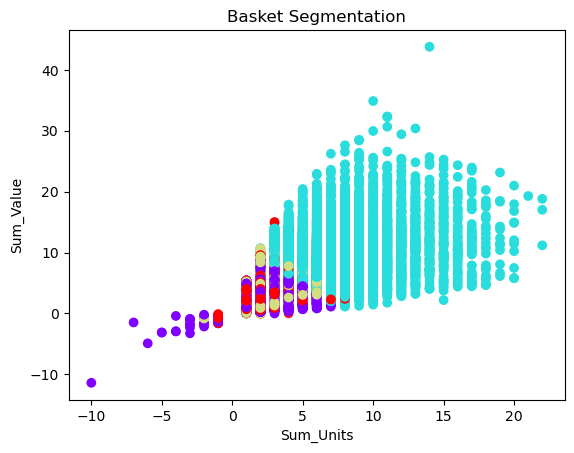

Average Sum_Value for Each Cluster:
Cluster
0    2.527621
1    8.777474
2    2.664837
3    2.522574
Name: Sum_Value, dtype: float64


In [419]:
plt.scatter(segmented_baskets['Sum_Units'], segmented_baskets['Sum_Value'], c=segmented_baskets['Cluster'], cmap='rainbow')
plt.xlabel('Sum_Units')
plt.ylabel('Sum_Value')
plt.title('Basket Segmentation')
plt.show()


average_values = segmented_baskets.groupby('Cluster')['Sum_Value'].mean()
print("Average Sum_Value for Each Cluster:")
print(average_values)

In [420]:
# marketing strategies based on clusters & their values

for cluster, avg_value in average_values.items():
    if avg_value > threshold_value:
        print(f"Cluster {cluster} has a high average value. Tailor marketing strategy accordingly.")
    else:
        print(f"Cluster {cluster} has an average or low average value. Adjust marketing strategy accordingly.")

Cluster 0 has a high average value. Tailor marketing strategy accordingly.
Cluster 1 has a high average value. Tailor marketing strategy accordingly.
Cluster 2 has a high average value. Tailor marketing strategy accordingly.
Cluster 3 has a high average value. Tailor marketing strategy accordingly.


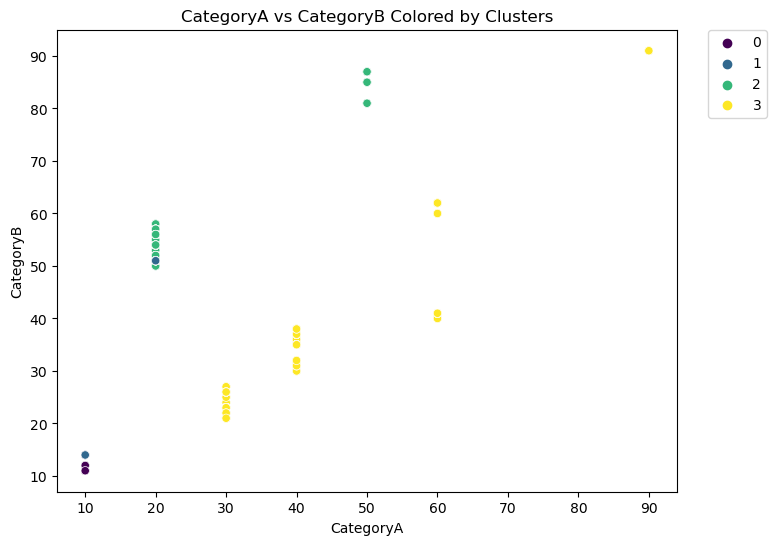

In [422]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=segmented_baskets, x='CategoryA', y='CategoryB', hue='Cluster', palette='viridis')
plt.xlabel('CategoryA')
plt.ylabel('CategoryB')
plt.title('CategoryA vs CategoryB Colored by Clusters')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

int64
0


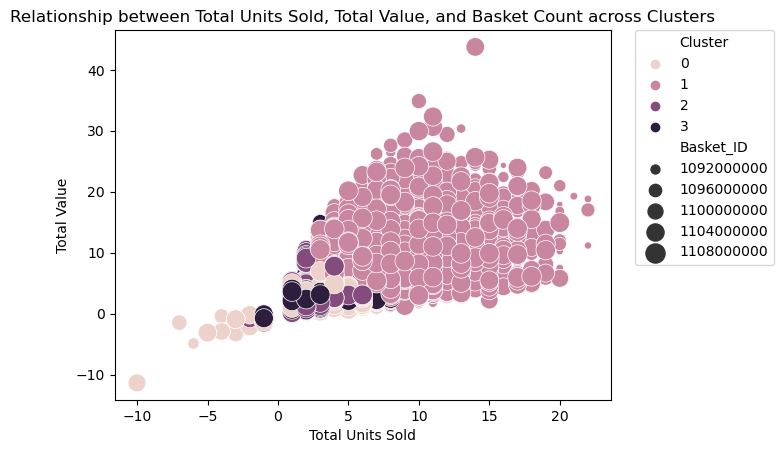

In [429]:
# Checking data types and missing values in 'Basket_count'
print(segmented_baskets['Basket_ID'].dtype)
print(segmented_baskets['Basket_ID'].isnull().sum())

# Convert 'Basket_count' to numeric (if not already) and handle missing values if present
segmented_baskets['Basket_ID'] = pd.to_numeric(segmented_baskets['Basket_ID'], errors='coerce')
segmented_baskets['Basket_ID'].fillna(0, inplace=True)  # Fill missing values with 0 for plotting

# Plotting the relationship between total units sold, total value, and basket count across clusters
sns.scatterplot(data=segmented_baskets, x='Sum_Units', y='Sum_Value', size='Basket_ID', hue='Cluster', sizes=(20, 200))
plt.xlabel('Total Units Sold')
plt.ylabel('Total Value')
plt.title('Relationship between Total Units Sold, Total Value, and Basket Count across Clusters')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Here are some specific observations from the scatterplot:

Cluster 1 has the highest total units sold and total value.
Cluster 3 has the lowest total units sold and total value.
Cluster 1 has the highest basket count.
Cluster 3 has the lowest basket count.
There are a few clusters that have high total units sold but low total value. This could be because these clusters sell lower-priced items.
There are a few clusters that have low total units sold but high total value. This could be because these clusters sell higher-priced items.

Upselling Strategies:

Clusters with High Total Units Sold but Low Total Value:
These clusters might be purchasing lower-priced items.

Strategies could include:

Bundle Offers: Create bundle deals or package offers that combine related products to increase the average order value.

Volume Discounts: Offer discounts for larger quantities to encourage customers to buy more.

Product Upgrades: Suggest premium or higher-priced versions of the items they are purchasing.


Cross-selling Strategies:
Clusters with Low Total Units Sold but High Total Value:
These clusters are buying fewer items but with higher value, suggesting they might be purchasing higher-priced items.

Complementary Product Suggestions: Recommend related or complementary higher-priced items based on their purchases.

Exclusive Offers: Provide exclusive deals or discounts on higher-priced items to encourage additional purchases.

Bundling with Accessories: Propose accessories or additional items that complement their high-value purchases.



In [430]:
high_performing_clusters = cluster_summary[
    (cluster_summary['Sum_Units'] > cluster_summary['Sum_Units'].quantile(0.75)) &
    (cluster_summary['Sum_Value'] > cluster_summary['Sum_Value'].quantile(0.75))
]

# Identify clusters with low unit sales and low value
low_performing_clusters = cluster_summary[
    (cluster_summary['Sum_Units'] < cluster_summary['Sum_Units'].quantile(0.25)) &
    (cluster_summary['Sum_Value'] < cluster_summary['Sum_Value'].quantile(0.25))
]

# Assess basket count trends per cluster
basket_count_trends = cluster_summary.sort_values(by='Basket_count', ascending=False)


Inventory Management Approach
Identify High-Performing Clusters:

Clusters with higher total units sold and total value indicate high-performing categories.
Devote adequate stock to these clusters to meet potential high demand.

Optimize Stock for Low-Performing Clusters:

Clusters with lower total units sold and total value might represent slower-moving or less popular categories.
Maintain moderate stock levels in these clusters to avoid overstocking.
Assess Basket Count Trends:

Analyze the basket count per cluster to understand customer purchasing behavior.
For clusters with higher basket counts, ensure sufficient stock variety to cater to diverse preferences.

In [431]:
high_performing_clusters

Sum_Units     Sum_Value  Basket_count
Cluster CategoryA CategoryB                                       
0       10.0      11.0           18556  21429.382557         10813
                  12.0           18890  37425.374240         12077
                  14.0           46121  52112.848194         21012
1       10.0      12.0            8825  19576.263744          1838
                  14.0           57372  64091.711785          7657
2       20.0      51.0            7689  21047.860980          6229
                  56.0           28290  35865.042361         14588
3       30.0      21.0           27863  38498.947350         15454
                  22.0            8534  17025.244573          6491
                  26.0            5094  12466.134889          3801
        40.0      31.0            6009   6778.679811          3795

In [442]:

if not high_performing_clusters.empty:
    top_selling_products = high_performing_clusters.groupby(['CategoryA', 'CategoryB']).sum()
    print(top_selling_products)
else:
    print("No data found for the specified high-performing clusters and categories.")

                     Sum_Units      Sum_Value  Basket_count
CategoryA CategoryB                                        
10.0      11.0           18556   21429.382557         10813
          12.0           27715   57001.637984         13915
          14.0          103493  116204.559979         28669
20.0      51.0            7689   21047.860980          6229
          56.0           28290   35865.042361         14588
30.0      21.0           27863   38498.947350         15454
          22.0            8534   17025.244573          6491
          26.0            5094   12466.134889          3801
40.0      31.0            6009    6778.679811          3795


In [432]:
low_performing_clusters

Sum_Units   Sum_Value  Basket_count
Cluster CategoryA CategoryB                                     
1       20.0      54.0              48   85.780044             9
                  55.0               7   22.700074             2
                  57.0              26   89.810564             8
        30.0      27.0               6   11.940044             1
        40.0      32.0               4   10.620014             1
                  35.0               7    6.800000             1
2       50.0      81.0              29   67.900015            29
                  87.0               4   11.000030             4
3       40.0      36.0              59  100.740073            55
        60.0      40.0              21   52.360088            11
                  41.0              23   64.169977            22

In [444]:
if not low_performing_clusters.empty:
    Low_selling_products = low_performing_clusters.groupby(['CategoryA', 'CategoryB']).sum()
    print(Low_selling_products)
else:
    print("No data found for the specified high-performing clusters and categories.")

                     Sum_Units   Sum_Value  Basket_count
CategoryA CategoryB                                     
20.0      54.0              48   85.780044             9
          55.0               7   22.700074             2
          57.0              26   89.810564             8
30.0      27.0               6   11.940044             1
40.0      32.0               4   10.620014             1
          35.0               7    6.800000             1
          36.0              59  100.740073            55
50.0      81.0              29   67.900015            29
          87.0               4   11.000030             4
60.0      40.0              21   52.360088            11
          41.0              23   64.169977            22


In [433]:
basket_count_trends

Sum_Units     Sum_Value  Basket_count
Cluster CategoryA CategoryB                                       
0       10.0      14.0           46121  52112.848194         21012
3       30.0      21.0           27863  38498.947350         15454
2       20.0      56.0           28290  35865.042361         14588
0       10.0      12.0           18890  37425.374240         12077
                  11.0           18556  21429.382557         10813
1       10.0      14.0           57372  64091.711785          7657
3       30.0      22.0            8534  17025.244573          6491
2       20.0      51.0            7689  21047.860980          6229
                  54.0            5834   6257.131043          3983
3       30.0      26.0            5094  12466.134889          3801
        40.0      31.0            6009   6778.679811          3795
2       20.0      50.0            4578   9874.599603          3773
                  57.0            2547   8869.873966          2193
3       30.0      23.0            2507   4656.500143          2017
1       10.0      12.0            8825  19576.263744          1838
2       20.0      55.0            1210   2159.565100           875
1       30.0      21.0            4474   6104.550320           746
        20.0      56.0            4855   6750.497111           719
3       40.0      32.0             821   1297.884075           641
1       10.0      11.0            4064   4442.659694           622
2       20.0      58.0             643   1473.163669           549
3       40.0      30.0             608   1200.033121           505
        30.0      27.0             408   1057.021411           348
        40.0      35.0             450    743.870669           331
        60.0      62.0             320    972.261074           257
        40.0      38.0             267    231.461275           186
        60.0      60.0             199    499.000145           174
        30.0      24.0             174    351.078707           156
2       20.0      52.0             157    474.785119           151
                  53.0             148    552.922023           147
3       90.0      91.0             141    702.249921           138
        40.0      37.0             108    119.619957            94
1       30.0      26.0             381   1038.473400            90
3       30.0      25.0              86    365.410475            85
1       30.0      22.0             305    721.151608            71
        20.0      51.0             219    773.362728            65
3       40.0      36.0              59    100.740073            55
2       50.0      85.0              43    123.920089            43
1       40.0      31.0             297    458.940720            42
2       50.0      81.0              29     67.900015            29
3       60.0      41.0              23     64.169977            22
1       20.0      50.0              55    130.143566            11
3       60.0      40.0              21     52.360088            11
1       30.0      23.0              65     75.090095            10
        20.0      54.0              48     85.780044             9
                  57.0              26     89.810564             8
2       50.0      87.0               4     11.000030             4
1       20.0      55.0               7     22.700074             2
        40.0      35.0               7      6.800000             1
                  32.0               4     10.620014             1
        30.0      27.0               6     11.940044             1

In [370]:
# Define metrics, dimensions, and identifier for segmentation
metrics = ['Sum_Units', 'Sum_Value']
dimensions = ['CategoryC', 'CategoryD']
identifier = 'Basket_ID'  # Replace with the actual column name

# Check if specified columns are present in the DataFrame
required_columns = dimensions + [identifier] + metrics
missing_columns = [col for col in required_columns if col not in df2.columns]

if missing_columns:
    print(f"Error: The following columns are missing in the DataFrame: {missing_columns}")
else:
    # Create segmented baskets based on metrics, dimensions, and identifier
    segmented_baskets = df2.groupby([identifier] + dimensions  )[metrics].sum().reset_index()

    # Example output
    print(segmented_baskets)



         Basket_ID  CategoryC  CategoryD  Sum_Units  Sum_Value
0       1089674688        8.0        2.0          1   1.640000
1       1089674689        8.0        4.0          1   0.989993
2       1089674689      228.0        1.0          2   0.160000
3       1089674689      228.0        3.0          1   0.460015
4       1089674689      284.0        2.0          2   1.980015
...            ...        ...        ...        ...        ...
201279  1109175674      202.0        2.0          1   2.640000
201280  1109175674      214.0        2.0          1   1.250007
201281  1109175674      228.0        1.0          1   1.410007
201282  1109175674      228.0        2.0          1   2.600000
201283  1109175675       81.0        4.0          1   3.620015

[201284 rows x 5 columns]


In [371]:
# Sort the DataFrame in descending order based on 'Sum_Units'
segmented_baskets_sorted_units = segmented_baskets.sort_values(by='Sum_Units', ascending=False)

# Sort the DataFrame in descending order based on 'Sum_Value'
segmented_baskets_sorted_value = segmented_baskets.sort_values(by='Sum_Value', ascending=False)


print("Sorted by Sum_Units:")
print(segmented_baskets_sorted_units)

print("\nSorted by Sum_Value:")
print(segmented_baskets_sorted_value)



Sorted by Sum_Units:
         Basket_ID  CategoryC  CategoryD  Sum_Units  Sum_Value
162286  1105430904      239.0        2.0         20   5.800029
88091   1098421389      213.0        4.0         17   5.100015
196940  1109148666      239.0        2.0         16   4.640000
128963  1102256631      239.0        1.0         16   8.800030
131087  1102258535      239.0        2.0         16   8.420044
...            ...        ...        ...        ...        ...
180609  1107340285      213.0        4.0         -3  -0.900015
177187  1106910678      216.0        2.0         -4  -2.320029
102796  1099544343      264.0        1.0         -4  -0.400000
177813  1106912129      216.0        2.0         -4  -2.320029
115843  1100781655      264.0        1.0         -7  -1.469993

[201284 rows x 5 columns]

Sorted by Sum_Value:
         Basket_ID  CategoryC  CategoryD  Sum_Units  Sum_Value
18642   1091577464      283.0        1.0          7  19.300045
39788   1093499774      100.0       10.0        

In [372]:
threshold_value = segmented_baskets['Sum_Value'].quantile(0.50)

threshold_value



1.63999998569489

In [373]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


selected_features = ['CategoryC', 'CategoryD', 'Sum_Units', 'Sum_Value']


data_for_clustering = segmented_baskets[selected_features].fillna(0)  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)


In [374]:

# Determine the optimal number of clusters using the Elbow Method
# In this example, we're iterating through a range of clusters to find the optimal number using inertia (within-cluster sum of squares)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)



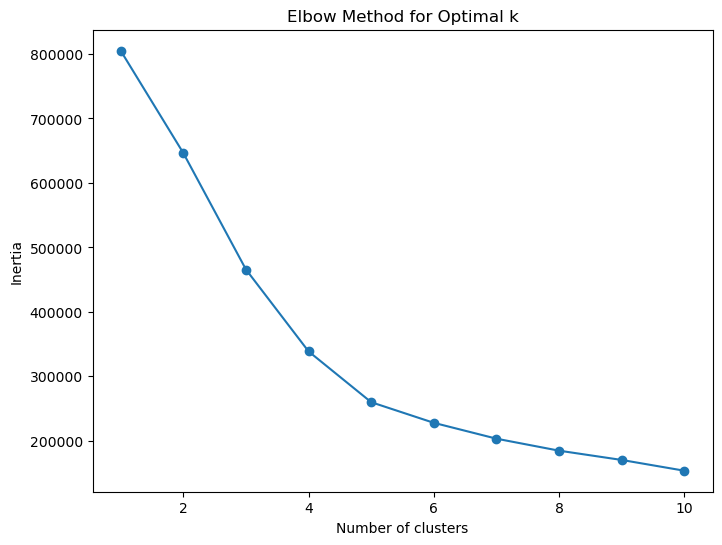

In [375]:
# Plot the Elbow Method to visualize the optimal number of clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



In [376]:

# Based on the Elbow Method, select the optimal number of clusters (k)
optimal_k = 4 


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)



In [377]:
segmented_baskets['Cluster'] = cluster_labels


cluster_summary = segmented_baskets.groupby('Cluster').agg({
    'CategoryC': 'count',
    'CategoryD': 'count',
    'Sum_Units': 'sum',
    'Sum_Value': 'sum',
    'Basket_ID': 'count'  
}).rename(columns={'Basket_ID': 'Basket_count'})


print(cluster_summary)



         CategoryC  CategoryD  Sum_Units      Sum_Value  Basket_count
Cluster                                                              
0           134954     134954     155363  209271.291461        134954
1            49781      49781      56838  121977.597692         49781
2              263        263        315     957.261015           263
3            16286      16286      56925   57112.382065         16286


In [378]:
segmented_baskets['Cluster'] = cluster_labels


cluster_summary = segmented_baskets.groupby(['Cluster','CategoryC','CategoryD']).agg({
    'Sum_Units': 'sum',
    'Sum_Value': 'sum',
    'Basket_ID': 'count'  
}).rename(columns={'Basket_ID': 'Basket_count'})


print(cluster_summary)



                             Sum_Units  Sum_Value  Basket_count
Cluster CategoryC CategoryD                                    
0       100.0     3.0                2   0.840117             2
                  5.0                3   1.290037             3
                  6.0                1   0.400117             1
        102.0     4.0                1   0.359736             1
        110.0     1.0                1   0.720411             1
...                                ...        ...           ...
3       773.0     21.0               3   6.000000             1
        783.0     16.0               2   5.700015             1
                  17.0               2   6.000000             1
        784.0     16.0               9  27.000000             4
        790.0     27.0               2   7.149992             1

[1126 rows x 3 columns]


In [404]:
print(cluster_summary[420:480]) 

                             Sum_Units    Sum_Value  Basket_count
Cluster CategoryC CategoryD                                      
0       364.0     2.0                9    21.900044             9
                  3.0               20    26.500044            19
                  4.0               28    48.339985            30
        374.0     1.0               10    42.000000            10
                  2.0               91    72.089950            82
        381.0     4.0               12    10.350140            11
        382.0     1.0                3     5.749993             3
                  3.0                1     0.100015             1
        383.0     1.0               10     0.100073             6
                  2.0                4    16.000000             4
                  3.0                1     1.000000             1
                  5.0                1     0.100015             1
                  12.0               2     4.000000             2
        38

In [383]:
cluster_summary

Sum_Units  Sum_Value  Basket_count
Cluster CategoryC CategoryD                                    
0       100.0     3.0                2   0.840117             2
                  5.0                3   1.290037             3
                  6.0                1   0.400117             1
        102.0     4.0                1   0.359736             1
        110.0     1.0                1   0.720411             1
...                                ...        ...           ...
3       773.0     21.0               3   6.000000             1
        783.0     16.0               2   5.700015             1
                  17.0               2   6.000000             1
        784.0     16.0               9  27.000000             4
        790.0     27.0               2   7.149992             1

[1126 rows x 3 columns]

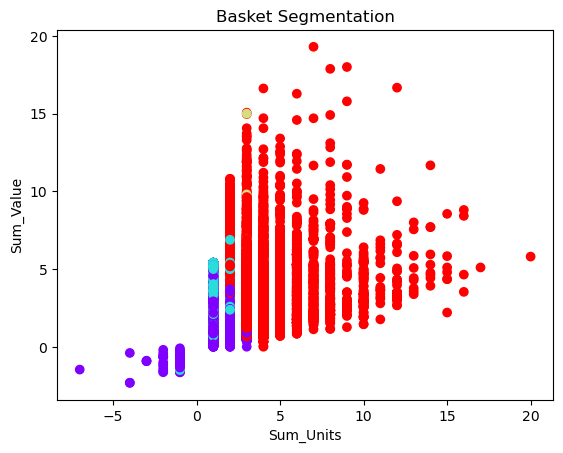

Average Sum_Value for Each Cluster:
Cluster
0    1.550686
1    2.450284
2    3.639776
3    3.506839
Name: Sum_Value, dtype: float64
Cluster 0 has an average or low average value.
Cluster 1 has a high average value. Tailor marketing strategy accordingly.
Cluster 2 has a high average value. Tailor marketing strategy accordingly.
Cluster 3 has a high average value. Tailor marketing strategy accordingly.


In [379]:
plt.scatter(segmented_baskets['Sum_Units'], segmented_baskets['Sum_Value'], c=segmented_baskets['Cluster'], cmap='rainbow')
plt.xlabel('Sum_Units')
plt.ylabel('Sum_Value')
plt.title('Basket Segmentation')
plt.show()


average_values = segmented_baskets.groupby('Cluster')['Sum_Value'].mean()
print("Average Sum_Value for Each Cluster:")
print(average_values)

# marketing strategies based on clusters & their values

for cluster, avg_value in average_values.items():
    if avg_value > threshold_value:
        print(f"Cluster {cluster} has a high average value. Tailor marketing strategy accordingly.")
    else:
        print(f"Cluster {cluster} has an average or low average value.")

In [405]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='CategoryA', y='CategoryB', hue='Cluster', palette='viridis')
plt.xlabel('CategoryA')
plt.ylabel('CategoryB')
plt.title('CategoryA vs CategoryB Colored by Clusters')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

NameError: name 'data' is not defined

<Figure size 800x600 with 0 Axes>

Clustering using K-means

For clusters identified as "high value" based on the threshold, understand the characteristics that make them high value. This could involve examining specific product categories, purchasing patterns, or customer demographics associated with these clusters.

Business Outcomes:

Relate the cluster characteristics to business outcomes. For example, if high-value clusters are associated with certain products or customer segments, consider how these insights can inform marketing strategies, promotions, or inventory management.


Iterative Analysis:
Conduct an iterative analysis, potentially adjusting the number of clusters or refining the features used for clustering, to improve the interpretability and relevance of the clusters.

Monitor:
Monitor the performance of marketing strategies implemented based on cluster insights. Be prepared to adapt strategies based on ongoing monitoring and feedback.

In [251]:
print(cluster_data.columns)

Index(['CategoryA_x', 'CategoryB_x', 'Barcode', 'Sum_Units', 'Sum_Value',
       'Cluster', 'CategoryA_y', 'CategoryB_y', 'CategoryC', 'CategoryD',
       'CombinedCategory'],
      dtype='object')


# Customer Segmentation

In [257]:
segmented_baskets.head()

,CategoryA,CategoryB,Barcode,Sum_Units,Sum_Value,Cluster
0,10.0,11.0,4082293,3,2.820044,0
1,10.0,11.0,5201260,4,4.739985,0
2,10.0,11.0,5201261,2,2.760029,0
3,10.0,11.0,5201325,2,1.280000,0
4,10.0,11.0,5449106,7,5.740073,0


In [273]:
df_4 = pd.merge(pos_data, segmented_baskets, on='Barcode', how='inner')

In [274]:
df_4

,Basket_ID,Date,Barcode,Sum_Units_x,Sum_Value_x,Card_ID,CategoryA,CategoryB,Sum_Units_y,Sum_Value_y
0,1103853519,41381,520139501183,1,5.349993,9.164002e+12,10.0,12.0,1,5.349993
1,1101859880,41375,520139501183,1,5.949993,NaN,10.0,12.0,1,5.349993
2,1099906392,41369,520139501183,1,5.949993,9.164013e+12,10.0,12.0,1,5.349993
3,1100779460,41372,520139501183,1,5.949993,NaN,10.0,12.0,1,5.349993
4,1104594187,41383,520139501183,2,10.170008,9.162000e+12,10.0,12.0,1,5.349993
...,...,...,...,...,...,...,...,...,...,...
201348,1106915869,41390,520447120323,1,0.480000,9.162000e+12,40.0,31.0,1,0.480000
201349,1099162190,41367,520139536202,1,3.400000,9.162005e+12,10.0,12.0,1,3.400000
201350,1101171617,41373,520134715912,1,4.760000,9.164002e+12,10.0,12.0,1,4.760000
201351,1108700763,41395,360814425059,1,1.420015,9.162000e+12,40.0,31.0,1,1.420015


In [275]:
customer_spend = df_4.groupby('Card_ID')['Sum_Value_y'].sum()

In [276]:
customer_spend

Card_ID
9.160000e+12    1482.342390
9.160000e+12     554.827674
9.160000e+12       4.102480
9.160000e+12     536.472812
9.160000e+12    1318.819957
                   ...     
9.164018e+12     502.188232
9.164018e+12     291.311020
9.164018e+12     470.691887
9.164018e+12     949.187001
9.164018e+12      80.488304
Name: Sum_Value_y, Length: 4339, dtype: float64

In [277]:
high_spenders = customer_spend[customer_spend > 1000]


In [278]:
high_spenders

Card_ID
9.160000e+12    1482.342390
9.160000e+12    1318.819957
9.160000e+12    2673.769598
9.160000e+12    1263.702011
9.160000e+12    2223.194311
                   ...     
9.164014e+12    2676.717654
9.164015e+12    1349.544066
9.164015e+12    1234.565723
9.164015e+12    1712.723873
9.164016e+12    1590.456607
Name: Sum_Value_y, Length: 1696, dtype: float64

In [285]:
# Merge relevant DataFrames based on common columns
merged_data = pd.merge(pos_data, loyalty_data, left_on='Card_ID', right_on='CardholderID', how='left')
df5 = pd.merge(merged_data, barcodes_data, on='Barcode', how='left')


In [286]:
df5

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CardholderID,Age,Gender,MaritalStatus,HouseholdSize,Children,CategoryA,CategoryB,CategoryC,CategoryD
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12,9.160004e+12,54.0,Female,NaN,2.0,0.0,10.0,14.0,239.0,2.0
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12,9.164002e+12,52.0,Unknown,Married,3.0,2.0,10.0,12.0,281.0,1.0
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12,9.164013e+12,NaN,Female,NaN,1.0,0.0,10.0,14.0,239.0,2.0
3,1106160983,41388,211069400000,1,0.749817,9.162006e+12,9.162006e+12,72.0,Female,NaN,1.0,0.0,20.0,56.0,183.0,9.0
4,1108695491,41395,520286400380,2,0.600000,9.161004e+12,9.161004e+12,51.0,Female,NaN,1.0,0.0,40.0,31.0,316.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235469,1093498033,41348,210996300000,1,4.040059,9.164013e+12,9.164013e+12,NaN,NaN,NaN,NaN,0.0,20.0,56.0,181.0,11.0
235470,1102688274,41377,520423909932,1,1.000000,9.162000e+12,9.162000e+12,NaN,NaN,NaN,NaN,0.0,10.0,14.0,201.0,1.0
235471,1089686077,41337,210757000000,1,1.330066,9.164004e+12,9.164004e+12,77.0,Male,NaN,3.0,NaN,20.0,56.0,183.0,11.0
235472,1099519315,41368,520423915759,2,3.180015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,14.0,202.0,2.0


In [ ]:
# Assuming 'merged_data' contains the data from the merge of different DataFrames

# Check for missing values
missing_values = df5.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values - Example: Fill missing numeric values with mean
numeric_cols = df5.select_dtypes(include=['float64', 'int64']).columns
merged_data[numeric_cols] = df5[numeric_cols].fillna(df5[numeric_cols].mean())

# Handling categorical missing values - Example: Fill missing categorical values with a placeholder
categorical_cols = df5.select_dtypes(include=['object']).columns
df5[categorical_cols] = df5[categorical_cols].fillna('Unknown')

# Check and convert data types if needed
df5['Date'] = pd.to_datetime(df5['Date'], errors='coerce')  # Example: Convert 'Date' column to datetime

# Remove duplicates if any
df5.drop_duplicates(inplace=True)

# Check the data types after conversion
print("Data Types:\n", df5.dtypes)


In [287]:
# Check for missing values
missing_values = df5.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Basket_ID             0
Date                  0
Barcode               0
Sum_Units             0
Sum_Value             0
Card_ID           86888
CardholderID      86888
Age              170429
Gender           104892
MaritalStatus    207098
HouseholdSize    104860
Children          99067
CategoryA          2227
CategoryB          2227
CategoryC          2227
CategoryD          2227
dtype: int64


In [288]:
# Handling missing values - Example: Fill missing numeric values with mean
numeric_cols = df5.select_dtypes(include=['float64', 'int64']).columns
merged_data[numeric_cols] = df5[numeric_cols].fillna(df5[numeric_cols].mean())

In [289]:
# Handling categorical missing values - Example: Fill missing categorical values with a placeholder
categorical_cols = df5.select_dtypes(include=['object']).columns
df5[categorical_cols] = df5[categorical_cols].fillna('Unknown')


In [290]:
# Remove duplicates if any
df5.drop_duplicates(inplace=True)

In [291]:
print("Data Types:\n", df5.dtypes)


Data Types:
 Basket_ID          int64
Date               int64
Barcode            int64
Sum_Units          int64
Sum_Value        float64
Card_ID          float64
CardholderID     float64
Age              float64
Gender            object
MaritalStatus     object
HouseholdSize    float64
Children         float64
CategoryA        float64
CategoryB        float64
CategoryC        float64
CategoryD        float64
dtype: object


In [294]:
df5.shape

(235474, 16)

In [296]:
def remove_outliers(df5, i):
    Q1 = df5[i].quantile(0.25)
    Q3 = df5[i].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5  # Adjust this threshold as needed for your data

    df_new = df5[~((df5[i] < (Q1 - threshold * IQR)) | (df5[i] > (Q3 + threshold * IQR)))]

    return df_new

outlier_treatment_cols = ['Sum_Units', 'Sum_Value']

for col in outlier_treatment_cols:
    df6 = remove_outliers(df5, col)

In [297]:
df6

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CardholderID,Age,Gender,MaritalStatus,HouseholdSize,Children,CategoryA,CategoryB,CategoryC,CategoryD
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12,9.160004e+12,54.0,Female,Unknown,2.0,0.0,10.0,14.0,239.0,2.0
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12,9.164002e+12,52.0,Unknown,Married,3.0,2.0,10.0,12.0,281.0,1.0
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12,9.164013e+12,NaN,Female,Unknown,1.0,0.0,10.0,14.0,239.0,2.0
3,1106160983,41388,211069400000,1,0.749817,9.162006e+12,9.162006e+12,72.0,Female,Unknown,1.0,0.0,20.0,56.0,183.0,9.0
4,1108695491,41395,520286400380,2,0.600000,9.161004e+12,9.161004e+12,51.0,Female,Unknown,1.0,0.0,40.0,31.0,316.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235469,1093498033,41348,210996300000,1,4.040059,9.164013e+12,9.164013e+12,NaN,Unknown,Unknown,NaN,0.0,20.0,56.0,181.0,11.0
235470,1102688274,41377,520423909932,1,1.000000,9.162000e+12,9.162000e+12,NaN,Unknown,Unknown,NaN,0.0,10.0,14.0,201.0,1.0
235471,1089686077,41337,210757000000,1,1.330066,9.164004e+12,9.164004e+12,77.0,Male,Unknown,3.0,NaN,20.0,56.0,183.0,11.0
235472,1099519315,41368,520423915759,2,3.180015,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,10.0,14.0,202.0,2.0


In [303]:
df6.shape

(218566, 17)

In [298]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


selected_features = ['Age', 'HouseholdSize', 'Sum_Units', 'Sum_Value']


data_for_clustering = df6[selected_features].fillna(0)  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [299]:
# Determine the optimal number of clusters using the Elbow Method
# In this example, we're iterating through a range of clusters to find the optimal number using inertia (within-cluster sum of squares)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

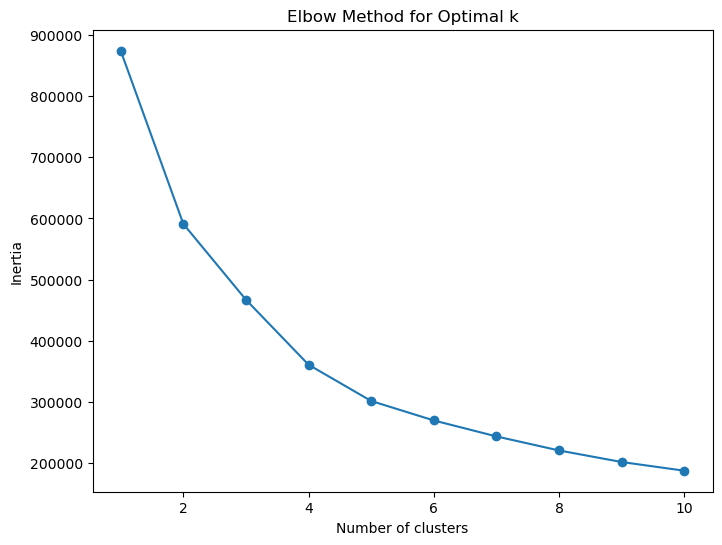

In [300]:
# Plot the Elbow Method to visualize the optimal number of clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [301]:
# Based on the Elbow Method, select the optimal number of clusters (k)
optimal_k = 3 


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

In [302]:

df6['Cluster'] = cluster_labels


cluster_summary = df6.groupby('Cluster').agg({
    'Age': 'mean',
    'HouseholdSize': 'mean',
    'Sum_Units': 'sum',
    'Sum_Value': 'sum',
    'Card_ID': 'count'  
}).rename(columns={'Card_ID': 'CustomerCount'})


print(cluster_summary)

               Age  HouseholdSize  Sum_Units      Sum_Value  CustomerCount
Cluster                                                                   
0        26.118950       1.117568     166955  263286.535426          71932
1        49.867245       2.493155      69081  107895.396327          60557
2        47.468644       1.648797      35016   23205.659058           5465


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


selected_features = ['Age', 'HouseholdSize', 'Sum_Units', 'Sum_Value']


data_for_clustering = df6[selected_features].fillna(0)  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)